# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/Users/alex/Downloads/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

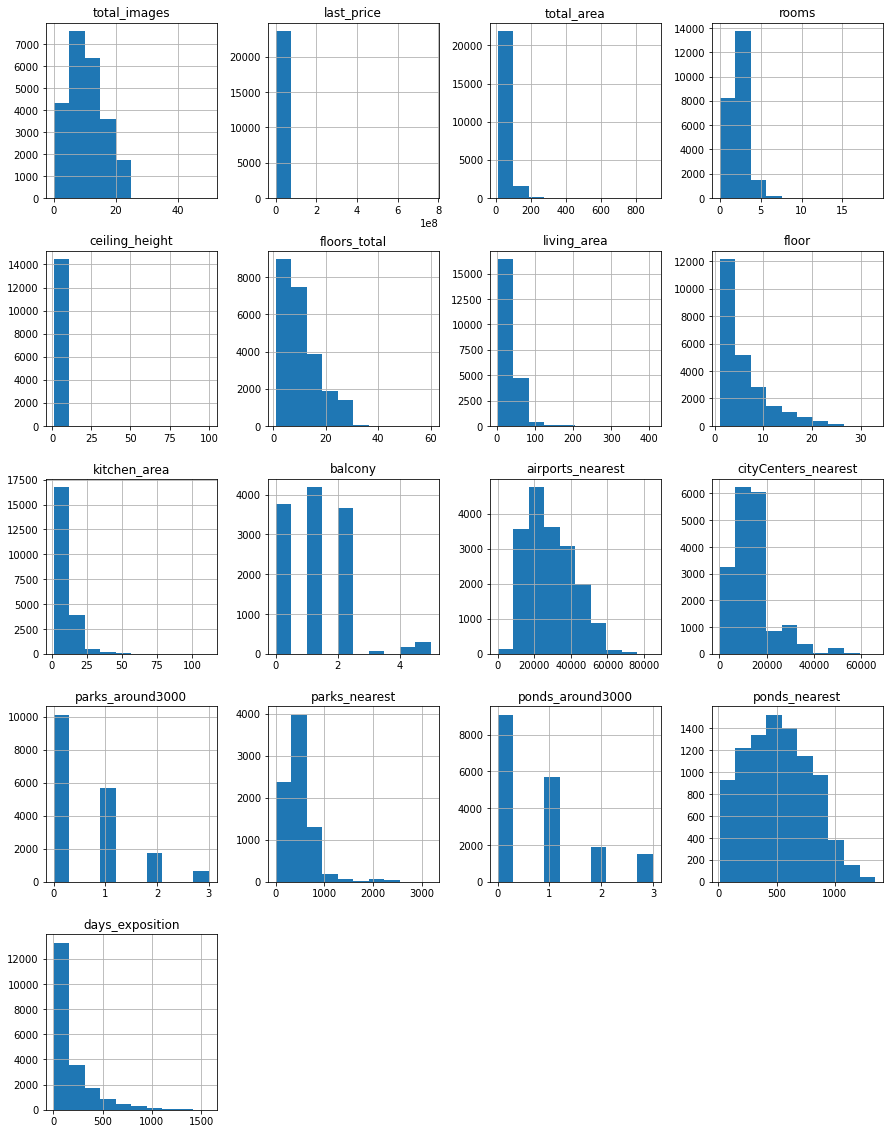

In [4]:
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

В датасете есть 3 отличающихся столбца по стилю написания, переименуем их в привычный снейк_кейс

In [5]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'}, inplace= True)
data.head(5)
# проверим на всякий, все - ок

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Посмотрим сколько мы имеем пропусков и в каких столбцах

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Пропускии имеются в следующих стобцах:
   - ceiling_height - высоту потолков, скорее всего можно будет заполнить медианным значением, но нужно проверить нет ли аномалий.
   - locality_name - пропусков не так много, решаем __не трогать пустые значения__, однако нужно изучить и __выявить дубликаты__ .
   - floors_total - количество этажей в доме, количество пропусков - мало, __не будем ничего менять__.              
   - living_area - пропуски имеются - менее 10%, удалять нельзя, т.к данные нужны для исследования, заполнить их нечем - __оставляем пропуски__
   - is_apartment - имеются пропуски, нужно изучить можно ли их заполнить булевым значением False 
   - kitchen_area - как и в случае с жилплощадью, заполнить пропуски нечем, __пропуски оставляем__.
   - balcony - сделаем, как и в примере, отсутствующие значения __заменим на 0__.
   - airports_nearest - можно заполнить __медианным__ значением отталкиваясь от __населенного пункта__.
   - city_centers_nearest  - как и в случае с аэро, заполним __медианой__ только уже в пределах __населенного пункта__.
   - parks_around_3000 - __можно заполнить 0 значением__.
   - parks_nearest - можно заполнить __медианой__ по каждому населеноому пункту.
   - ponds_around_3000 - по аналогии с парком, скорее  всего нет рядом водоема , поэтому заполним , __как 0 либо вообще удалим столбец, тк в исследовнии не понадобится__.      
   - ponds_nearest - по аналогии с парком, __заполним медианным значением либо вообще удалим столбец, тк в исследовнии не понадобится__.
   - days_exposition - __пропуски решаем оставить__, тк нечем заполнить эти данные
   
Как итог: смотрим ceiling_height, locality_name, is_apartment, parks_around_3000, parks_nearest, balcony

#### Начнем с высоты потолков

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

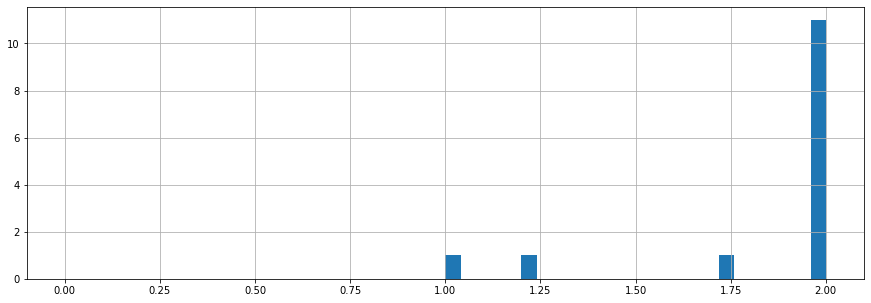

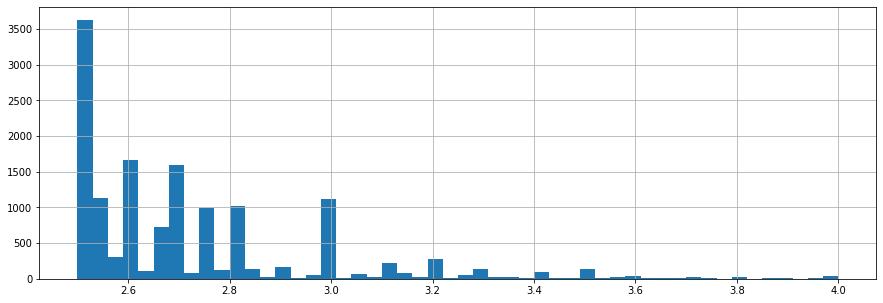

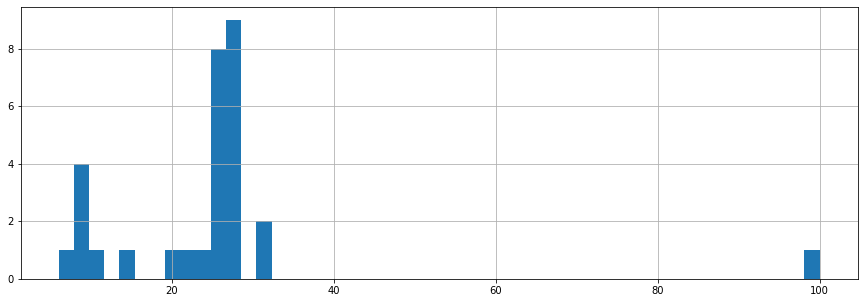

In [9]:
data['ceiling_height'].hist(bins = 50, range = (0,2), figsize = (15,5))
plt.show()
data['ceiling_height'].hist(bins = 50, range = (2.5,4), figsize = (15,5))
plt.show()
data['ceiling_height'].hist(bins = 50, range = (6,100), figsize = (15,5))
plt.show()

Исходя из представленных гистограмм - можно выделить следующее: имеются 'обычные' потолки от 2 до 3.5 метров, и встречаются выбивающиеся значения < 2 метров и 100 метров, потолки в районе 20-35 метров - вероятно при заполнении забыли запятую их можно привести в нормальный вид разделив на 10

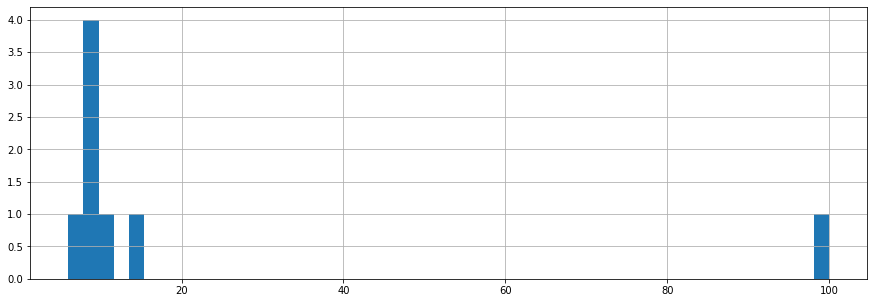

In [10]:
ceiling_bag = data.query('ceiling_height >= 20 and ceiling_height <= 35').index
data.loc[ceiling_bag, 'ceiling_height'] = data.loc[ceiling_bag, 'ceiling_height'] / 10
data['ceiling_height'].hist(bins=50, range=(6,100), figsize=(15,5))
plt.show()

Как видно на рисунке выше, мы избавились от аномальных значений потолков в диапозоне 20-35 метров. Далее обработаем значения ниже 2 метров и от 6 метров и выше, путем удаления т.к не совсем представляю квартиры с потолками ниже 2 и сильно выше(это либо дом хоббитов либо замок в центре Питера-).... к тому же выборка невелика, и не сильно повлияет на дальнейший анализ. Так же зададим индекс и применим метод drop()

In [11]:
ceiling_low_high = data.query('ceiling_height < 2 | ceiling_height > 6').index
data.drop(ceiling_low_high, inplace=True, axis=0)

Т.к. мы удалили часть строк, индексация нарушилась, восстановим ее. И вернемся к заполнению пропусков медионой.

In [12]:
data.reset_index(inplace= True,drop= True)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           21786 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          2773 non-null   object 
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          21413 non-null  float64
 13  balcony               12176 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

С высотой все - ок , едем дальше

#### locality_name , начнем с имен 

In [13]:
# Посчитаем кол-во уникальных значений
data['locality_name'].value_counts()

Санкт-Петербург                                            15714
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
деревня Трубников Бор                                          1
посёлок Сумино                                                 1
деревня Терпилицы                                              1
деревня Куровицы                                               1
садоводческое некоммерческое товарищество Лесная Поляна        1
Name: locality_name, Length: 364, dtype: int64

In [14]:
# Глянем все уникальные значения отсортировав их
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

- Изучив иникальные значения , наблюдаем, что в некоторых случаях, имена населенных пунктов записаны через (ё), а некоторые через (е) - __заменим все "ё" на "е"__.
- Так же заменим  __"городской поселок"__ на __"поселок городского типа"__.

In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [16]:
data['locality_name'].value_counts()

Санкт-Петербург            15714
поселок Мурино               556
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Большое Рейзино        1
село Никольское                1
деревня Чудской Бор            1
поселок станции Лужайка        1
поселок Тесово-4               1
Name: locality_name, Length: 330, dtype: int64

In [17]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [18]:
data['locality_name'].value_counts()

Санкт-Петербург                     15714
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Мыза-Ивановка                   1
деревня Старое Хинколово                1
садовое товарищество Рахья              1
садовое товарищество Новая Ропша        1
поселок Тесово-4                        1
Name: locality_name, Length: 323, dtype: int64

Таким оброзом мы избавились от 41 уникального имени(точнее привели к единому формату), теперь проверим имеются ли пустые/незаполненные имена.

In [19]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Удалось выявить еще 17 неявных дубликатов

In [20]:
data = data.replace({'locality_name':{'деревня Кудрово': 'Кудрово',
                                      'поселок Любань':'Любань',
                                      'поселок Мурино':'Мурино',
                                      'село Никольское':'Никольское',
                                      'поселок Гарболово':'деревня Гарболово',
                                      'деревня Зимитицы':'поселок Зимитицы',
                                      'деревня Калитино':'поселок Калитино',
                                      'поселок Рабитицы':'деревня Рабитицы',
                                      'деревня Федоровское':'поселок городского типа Федоровское',
                                      'поселок Щеглово':'деревня Щеглово',
                                      'коттеджный поселок Лесное':'поселок Лесное',
                                      'поселок станции Громово':'поселок Громово',
                                      'село Павлово':'поселок городского типа Павлово',
                                      'садовое товарищество Приладожский':'поселок городского типа Приладожский',
                                      'садовое товарищество Рахья':'поселок городского типа Рахья',
                                      'поселок станции Вещево':'поселок при железнодорожной станции Вещево',
                                      'поселок при железнодорожной станции Приветнинское':'поселок станции Приветнинское',}})


In [21]:
# было 323, стало 306
data['locality_name'].value_counts()

Санкт-Петербург                       15714
Мурино                                  590
Кудрово                                 472
поселок Шушары                          440
Всеволожск                              398
                                      ...  
поселок Петро-Славянка                    1
деревня Рапполово                         1
поселок городского типа Свирьстрой        1
село Шум                                  1
поселок Тесово-4                          1
Name: locality_name, Length: 306, dtype: int64

In [22]:
data['locality_name'].isnull().sum()
print(len(data))

23689


Удалим пропуски, тк обьявления без локации, мне кажется, адрес/город и тд это первый пункт , когда люди выбирают себе квартиру, плюс для нашего дальнейшего анализа малое это количество не сыграет роль.

In [23]:
data = data.dropna(subset=['locality_name'])

In [24]:
# проверим
data['locality_name'].isnull().sum()
data.reset_index(inplace= True,drop= True)
print(len(data))

# все ок, едем дальше

23640


Как итог, мы удалили строки с пропущенными городами и привели к единному формату 41 имя.

#### is_apartment -  апартаменты (булев тип)

In [25]:
# Посмотрим уникальные значения

data['is_apartment'].value_counts()

False    2709
True       49
Name: is_apartment, dtype: int64

Можно было бы предположить, что незаполненные значения - это квартиры, но есть объявления со значением True.

Значит просто так заполнить NaN значениями False нельзя, __обработку пустых значений делать не будем__.

#### balcony - пропуски заменяем на 0

In [26]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()
# все ок едем дальше

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20882
studio                      0
open_plan                   0
kitchen_area             2267
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15580
ponds_around_3000        5508
ponds_nearest           14560
days_exposition          3180
dtype: int64

#### airports_nearest - расстояние до аэро

   - можно заполнить __медианным__ значением отталкиваясь от __населенного пункта__


Сгруппируем по городам и вычислим медианое расстояние для каждого города(где это возможно) и запишем в переменную.

In [27]:
air_median = data.groupby('locality_name')['airports_nearest'].median().sort_values()
# удаляем строки(пустые), где не удалось рассчитать медиану
air_median = air_median.dropna()
air_median

locality_name
поселок Александровская    12896.5
Пушкин                     15766.0
поселок Шушары             17427.0
Павловск                   20529.5
поселок Петро-Славянка     20605.0
Красное Село               25717.0
поселок Металлострой       25758.0
Колпино                    26232.0
поселок Усть-Ижора         26510.5
Санкт-Петербург            26757.0
поселок Стрельна           28317.0
поселок Понтонный          30642.0
поселок Саперный           34147.5
Петергоф                   39231.0
Ломоносов                  48415.5
Мурино                     51553.0
поселок Левашово           52693.0
поселок Парголово          53426.0
поселок Песочный           54831.5
поселок Лисий Нос          55909.0
Сестрорецк                 56692.0
поселок Белоостров         57769.0
поселок Репино             61797.5
деревня Щеглово            61908.0
Кронштадт                  67850.0
Зеленогорск                72282.0
поселок Молодежное         84665.0
Name: airports_nearest, dtype: float64

Теперь напишем функцию, которая будет получать __на вход имя города__, а возвращать __медиану__, либо __пустое значение__ этому городом городу

In [28]:
def air_func(location):
    if location not in air_median:
        return np.nan
    return air_median[location]


# проверим работает ли и что возвращает
print(air_func('Зеленогорск'))
print(air_func('поселок станции Лужайка'))
print(air_func('деревня Горбунки'))

72282.0
nan
nan


In [29]:
# Все работает, теперь заменим пропуски медианой, там где это возможно
# И глянем, сколько значений нам не удалось заменить

data.loc[data['airports_nearest'].isna()==True, 'airports_nearest'] = data['locality_name'].apply(air_func)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           21742 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          21373 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

Как итог нам удалось заполнить __629 значений__, оставшиеся пропуски оставляем, как есть.

Едем дальше.

#### city_centers_nearest

Расстояние до центра, будем делать __аналогично__, как в случае с __аэро__.

In [30]:
# вычислим медиану
city_median = data.groupby('locality_name')['city_centers_nearest'].median().sort_values()
city_median = city_median.dropna() 
city_median

locality_name
Санкт-Петербург            12245.0
поселок Парголово          19311.0
Мурино                     21888.0
поселок Стрельна           23506.0
поселок Шушары             24212.0
поселок Левашово           25727.0
поселок Песочный           26099.5
поселок Петро-Славянка     27165.0
поселок Александровская    27468.0
поселок Металлострой       27602.0
Пушкин                     27930.5
поселок Усть-Ижора         28222.5
поселок Лисий Нос          28226.0
Красное Село               29142.0
Колпино                    32018.0
поселок Понтонный          32354.0
Павловск                   32683.0
Петергоф                   33771.0
деревня Щеглово            34085.0
Сестрорецк                 34821.0
поселок Саперный           35859.5
поселок Белоостров         38868.0
поселок Репино             42896.5
Кронштадт                  49575.0
Ломоносов                  51677.0
Зеленогорск                53381.0
поселок Молодежное         65764.0
Name: city_centers_nearest, dtype: float6

In [31]:
def city_func(location):
    if location not in city_median:
        return np.nan
    return city_median[location]


# проверим работает ли и что возвращает
print(city_func('Павловск'))
print(city_func('посёлок станции Громово'))
print(city_func('поселок Мурино'))

32683.0
nan
nan


In [32]:
# Все работает, теперь заменим пропуски медианой, там где это возможно
# И глянем, сколько значений нам не удалось заменить

data.loc[data['city_centers_nearest'].isna()==True, 'city_centers_nearest'] = data['locality_name'].apply(city_func)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           21742 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          21373 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

Как итог нам удалось заполнить __647 значений__, оставшиеся пропуски оставляем, как есть.

Едем дальше.

#### parks_around_3000  

In [33]:
# Заполняем пустые значения на 0, т.к видимо парков в радиусе 3км в этих населенных пунктах нет

data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

In [34]:
data.info()

# от пропусков избавились

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           21742 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          21373 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

#### parks_nearest

По аналогии с аэро вычислим расстояние

In [35]:
# вычислим медиану
parks_median = data.groupby('locality_name')['parks_nearest'].median().sort_values()
parks_median = parks_median.dropna() 
parks_median

locality_name
Зеленогорск          147.5
Кронштадт            293.0
Петергоф             294.0
Павловск             312.0
Сестрорецк           367.0
Колпино              393.0
Пушкин               399.5
Ломоносов            407.0
Красное Село         428.5
Санкт-Петербург      460.0
поселок Стрельна     700.0
поселок Парголово    733.0
Name: parks_nearest, dtype: float64

In [36]:
def parks_func(location):
    if location not in parks_median:
        return np.nan
    return parks_median[location]


# проверим работает ли и что возвращает
print(parks_func('Павловск'))
print(parks_func('посёлок Ильичёво'))
print(parks_func('поселок Стрельна'))

312.0
nan
700.0


In [37]:
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(parks_func)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           21742 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          21373 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

Как итог нам удалось заполнить __9584__ значений, скорее всего такое большое кол-во пропусков было в объявлениях по г. Санкт-Петербург, оставшиеся пропуски оставляем, как есть.

Едем дальше.

#### living_area

In [39]:
# считаем коэф. отношения жилплощади к общей площади, заполняем пропуски
living_area_ratio = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace = True)

#### kitchen_area

In [40]:
# считаем коэф. отношения площ.кухни к общей площади, заполняем пропуски
kitchen_area_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_area_ratio * data['total_area'], inplace = True)

In [41]:
# пропуски в living_area и kitchen_area заполнены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           23640 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          23640 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

#### days_exposition - пропуски решаем оставить как есть.

### Типы данных

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23640 non-null  int64  
 1   last_price            23640 non-null  float64
 2   total_area            23640 non-null  float64
 3   first_day_exposition  23640 non-null  object 
 4   rooms                 23640 non-null  int64  
 5   ceiling_height        23640 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           23640 non-null  float64
 8   floor                 23640 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23640 non-null  bool   
 11  open_plan             23640 non-null  bool   
 12  kitchen_area          23640 non-null  float64
 13  balcony               23640 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

Мы можем преобразовать данные для следующих столбцов 
- last_price  в __int__
- first_day_exposition  в __datetime__
- balcony  в __int__ 
- parks_around_3000  в __int__ 
- days_exposition  в __int__

#### Меняем

In [43]:
# меняем тип данных, чтобы отбросить лишние нули 
data['last_price'] = data['last_price'].astype('int')

# меняем тип, для более привычного восприятия
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# 0 нам не нужны в конце, т.к не может быть 1,5/2,7 и т.д балконов)
data['balcony'] = data['balcony'].astype('int')

# аналогично балконам, врядли в объявлении будут писать 1,3 парка)
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23640 non-null  int64         
 1   last_price            23640 non-null  int64         
 2   total_area            23640 non-null  float64       
 3   first_day_exposition  23640 non-null  datetime64[ns]
 4   rooms                 23640 non-null  int64         
 5   ceiling_height        23640 non-null  float64       
 6   floors_total          23555 non-null  float64       
 7   living_area           23640 non-null  float64       
 8   floor                 23640 non-null  int64         
 9   is_apartment          2758 non-null   object        
 10  studio                23640 non-null  bool          
 11  open_plan             23640 non-null  bool          
 12  kitchen_area          23640 non-null  float64       
 13  balcony         

# Заключение 
__На данном этапе мы проделали следующие шаги__:
 - заполнили пропуски в __ceiling_height__ и избавились от аномалий. 
 - заполнили пропуски в __balcony__.
 - заполнили пропуски в __locality_name__ и привели к общему формату.
 - заполнили пропуски в __airports_nearest__, где это было возможно.
 - заполнили пропуски в __city_centers_nearest__, где это было возможно.
 - заполнили пропуски в __parks_around_3000__.
 - заполнили пропуски в __parks_nearest__, где это было возможно.
 
 - изменили типы данных в столбцах __last_price, first_day_exposition, balcony, parks_around_3000__.
  

__P.S.__ Очень странно, что у ряда населенных пунктов находящихся близ северной столицы, не заполнены расстояние до центра, расстоние до ближайшего парка, до аэропорта и т.д. Это либо человечский фактор/пользователи специально не указываю расстояние т.к. все жители/пользователи прекрасно понимают, что данный населеный пункт находится близко - буквально за КАДом, к примеру город Всеволожск, там и парки и до центра Питера ехать минут 30-40, однако данные по этому городу пусты во всех объявлениях, либо при выгрузки данных был какой-то сбой, к примеру в одной базе расстояние хранилось в строчном формате "7560", а у нас инт - 7560 метров. Очень интересно, но не понятно)


Двигаемся дальше

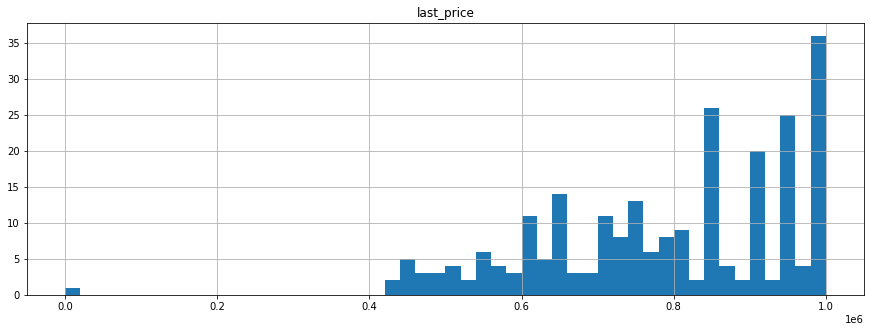

8775         12190
17419       430000
14883       430000
16242       440000
9562        450000
           ...    
15622    300000000
1435     330000000
14678    401300000
19498    420000000
12947    763000000
Name: last_price, Length: 23640, dtype: int64


In [45]:
data.hist('last_price', bins = 50, range=(0, 1000000), figsize=(15,5))
plt.show()
print(data['last_price'].sort_values(ascending = True))

In [46]:
# До
print(len(data))

23640


Нашли аномально низкую цену , удалим ее, затем восстановим порядок индексов.

In [47]:
last_price_anomaly = data.query('last_price < 430000').index
data.drop(last_price_anomaly, inplace=True, axis=0)
data.reset_index(inplace= True,drop= True)
# После
print(len(data))

23639


## Посчитайте и добавьте в таблицу новые столбцы

### Высчитать цену 1кв метра и добавить новый столбец.

In [48]:
# Тут все просто , делим стоимость квартиры на общую площадь квартиры, записываем в отдельный столбец.
data['one_metr_price'] = data['last_price'] / data['total_area']

# Сразу поменяем тип на Int, как и в случае с last_price
data['one_metr_price'] = data['one_metr_price'].astype('int')
# Глянем, что вышло.
data.sample(3)
# Едем дальше

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price
8655,9,5250000,60.9,2017-07-27,3,2.50,9.0,39.4,7,NaN,...,1,Санкт-Петербург,12727.0,15318.0,0,460.0,0.0,NaN,324.0,86206
7789,20,6600000,91.0,2016-03-28,4,2.65,18.0,51.0,1,NaN,...,0,Санкт-Петербург,42222.0,21539.0,0,460.0,1.0,487.0,683.0,72527
15157,20,8635000,58.0,2019-02-20,2,2.50,5.0,35.2,5,NaN,...,0,Санкт-Петербург,26679.0,8535.0,1,550.0,0.0,NaN,63.0,148879


### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [49]:
# С помощью метода df['date_column'].dt.weekday вычислим день и добавим новый столбец
data['week_exposition'] = data['first_day_exposition'].dt.weekday
data.sample(3)
# Все ок, едем дальше.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price,week_exposition
1969,9,4650000,41.10,2018-07-05,1,2.65,25.0,17.00,6,NaN,...,Санкт-Петербург,37948.0,14769.0,0,460.0,0.0,NaN,97.0,113138,3
12879,15,4350000,57.20,2018-08-01,3,2.50,9.0,39.00,1,NaN,...,Санкт-Петербург,49270.0,17185.0,1,572.0,0.0,NaN,99.0,76048,2
9494,7,3150000,34.42,2017-06-14,1,2.60,27.0,13.09,26,NaN,...,поселок Парголово,53115.0,19292.0,0,733.0,1.0,593.0,45.0,91516,2


### Месяц публикации объявления

In [50]:
# По аналогии с днями , проделаем тоже самое и добавим новый столбец month_exposition.
data['month_exposition'] = data['first_day_exposition'].dt.month
data.sample(3)
# Все ок, едем дальше.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price,week_exposition,month_exposition
7487,13,2950000,31.0,2018-10-19,1,2.5,5.0,17.6,4,NaN,...,40619.0,11663.0,2,386.0,0.0,NaN,28.0,95161,4,10
9737,17,21000000,150.0,2018-02-01,4,3.0,5.0,72.0,4,NaN,...,15036.0,14795.0,2,668.0,0.0,NaN,135.0,140000,3,2
2437,10,5400000,40.8,2019-03-19,2,2.5,9.0,23.4,1,NaN,...,29782.0,7154.0,0,460.0,1.0,434.0,NaN,132352,1,3


### Год публикации объявления.

In [51]:
# Проделаем тоже самое и добавим новый столбец year_exposition.
data['year_exposition'] = data['first_day_exposition'].dt.year
data.sample(3)
# Все ок, едем дальше.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price,week_exposition,month_exposition,year_exposition
22251,20,17000000,108.1,2017-09-27,4,2.65,6.0,64.2,2,NaN,...,6128.0,1,470.0,1.0,44.0,82.0,157261,2,9,2017
17016,9,4700000,45.5,2018-03-14,2,2.50,9.0,28.5,5,NaN,...,17073.0,0,460.0,0.0,NaN,18.0,103296,2,3,2018
4088,12,5450000,57.6,2018-04-06,3,2.65,9.0,39.4,3,NaN,...,13261.0,0,460.0,1.0,544.0,23.0,94618,4,4,2018


### Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [52]:
# Сначала создадим столбец и заполним его пустыми значениями.
data['floor_class'] = np.nan

# Создадим функцию получающую на вход строку, затем оператор обрабатывает значение строки и присваивает определенное значение.
def floor_class(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'     

data['floor_class'] = data.apply(floor_class, axis=1)

In [53]:
print(data['floor_class'].value_counts())
data.head(3)
# Все работает корректно, едем дальше.

другой       17401
последний     3328
первый        2910
Name: floor_class, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price,week_exposition,month_exposition,year_exposition,floor_class
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,1,90.0,2.0,574.0,558.0,92785,3,8,2015,другой


### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [54]:
# С помощью встроенной функции Python - round округляем значение.  
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr_price,week_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,NaN,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.730769,9,NaN,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0


# Заключение

На данном этапе мы сделали следующее: 
 - добавили столбец one_metr_price.
 - добавили столбец week_exposition
 - добавили столбец month_exposition
 - добавили столбец year_exposition
 - добавили столбец floor_class
 - добавили столбец city_centers_nearest_km
 

Двигаемся дальше.

## Проведите исследовательский анализ данных

#### Общая площадь

In [55]:
data['total_area'].describe()

count    23639.000000
mean        60.333064
std         35.666632
min         12.000000
25%         40.000000
50%         52.000000
75%         69.725000
max        900.000000
Name: total_area, dtype: float64

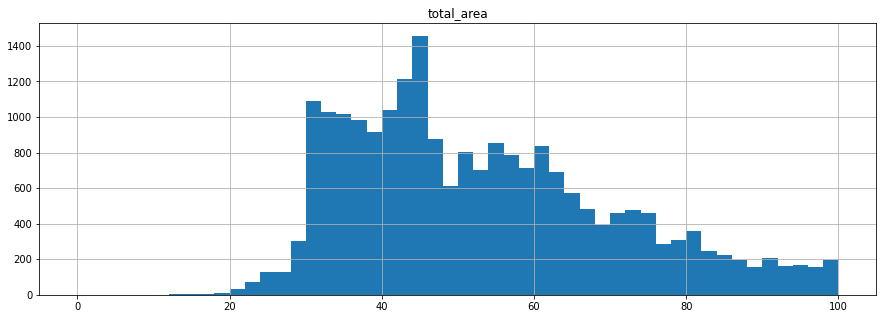

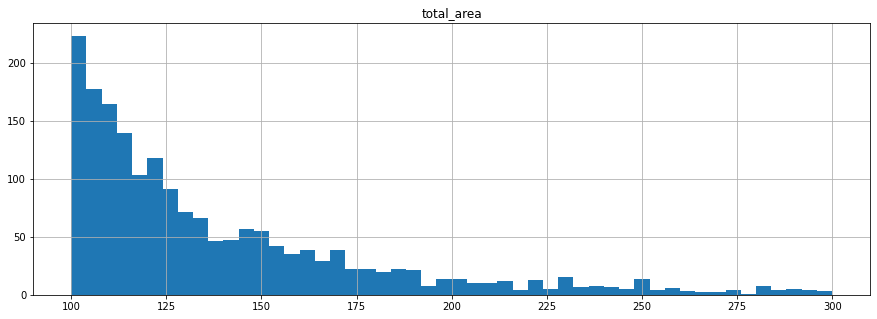

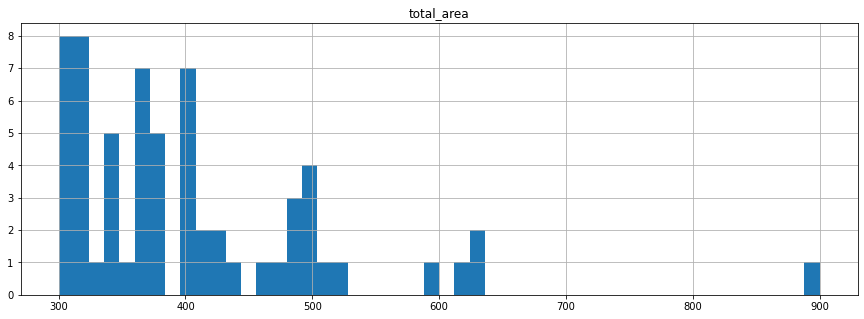

In [56]:
data.hist('total_area', bins = 50, range = (0,100), figsize = (15,5))
plt.show()
data.hist('total_area', bins = 50, range = (100,300), figsize = (15,5))
plt.show()
data.hist('total_area', bins = 50, range = (300,900), figsize = (15,5))
plt.show()

Глядя на представленные гистограммы можно выделить следущее, мы имеем большое количество квартир с общей площадью в районе 45кв.м. Квартиры с площадью менее 45м. встречаются реже, но все же их кол-во велико, в то время квартиры свыше 100кв.м. показывают нам отрицательную корреляцию(если так можно назвать), с увеличением площади количество объявлений снижается.

#### Жилая площадь

In [57]:
data['living_area'].describe()

count    23639.000000
mean        34.616889
std         22.390180
min          2.000000
25%         19.000000
50%         30.000000
75%         42.115385
max        409.700000
Name: living_area, dtype: float64

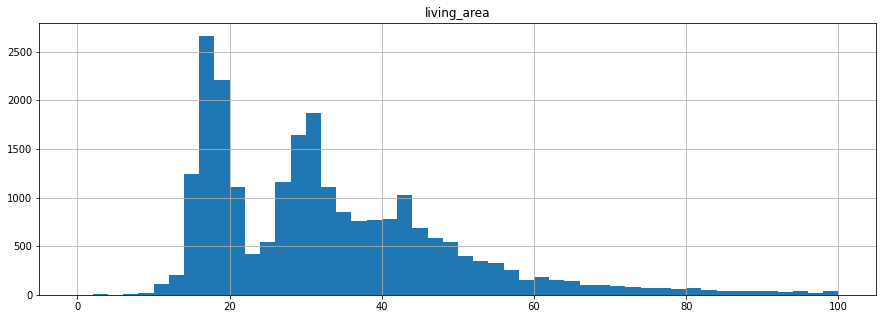

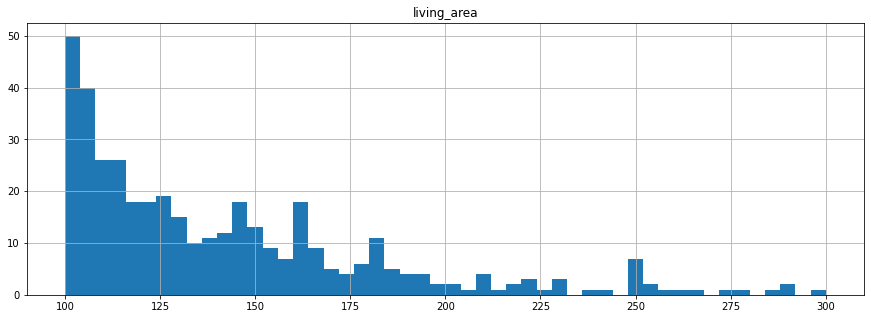

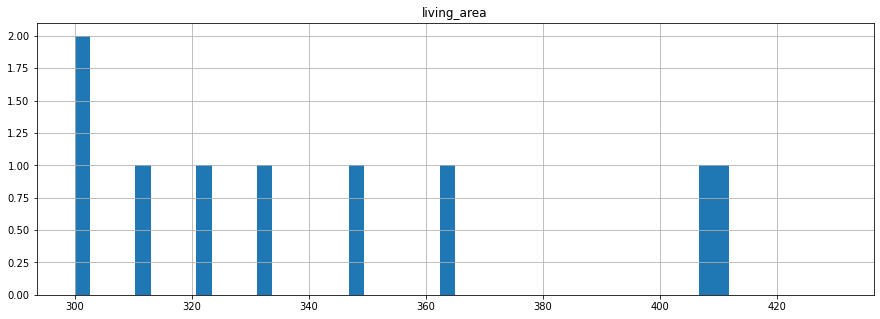

In [58]:
data.hist('living_area', bins = 50, range = (0,100), figsize = (15,5))
plt.show()
data.hist('living_area', bins = 50, range = (100,300), figsize = (15,5))
plt.show()
data.hist('living_area', bins = 50, range = (300,430), figsize = (15,5))
plt.show()

Глядя на представленные гистограммы, видно, что на первой присутвуют 2 пиковых значения, в районе 18кв.м. и 32-34кв.м.,скорее всего такая __жилая площадь__ относится к квартирам с 1 и 2мя комнатами, плюс к первому значению еще можно добавить квартиры-студии, квартиры с площадью выше 40 встречаются реже. Есть, как и очень большие значения площади - можно предположить, что эти объявления о продажи загородных домов, так и выбивающиеся малые значения до 5кв.м., но т.к. количество таких объявлений мало - это не повлияет на результат исселедования.

#### Площадь кухни.

In [59]:
data['kitchen_area'].describe()

count    23639.000000
mean        10.501679
std          6.034863
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

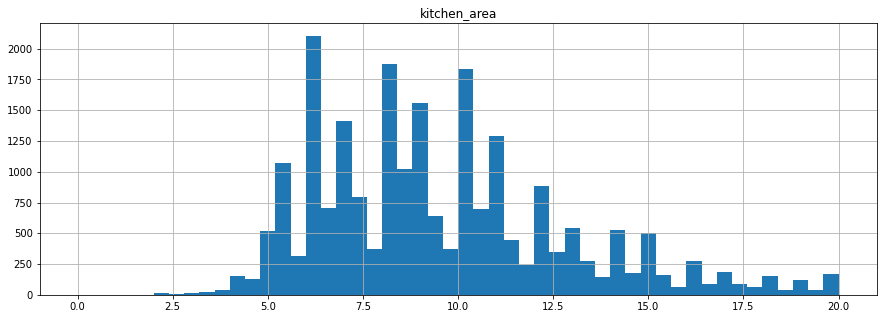

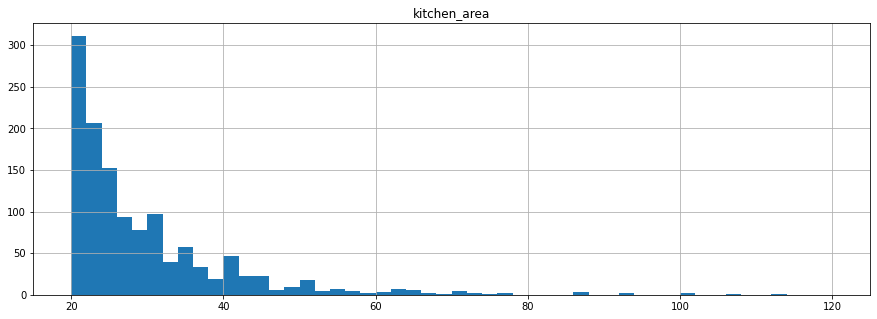

In [60]:
data.hist('kitchen_area', bins = 50, range = (0,20), figsize = (15,5))
plt.show()
data.hist('kitchen_area', bins = 50, range = (20,120), figsize = (15,5))
plt.show()

По графикам видно, что большинство кухнонь в диапозоне от 5 до 12кв.м. остальные значения встречаются реже. 

#### Цена объекта

In [61]:
data['last_price'].describe()

count    2.363900e+04
mean     6.541822e+06
std      1.089859e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

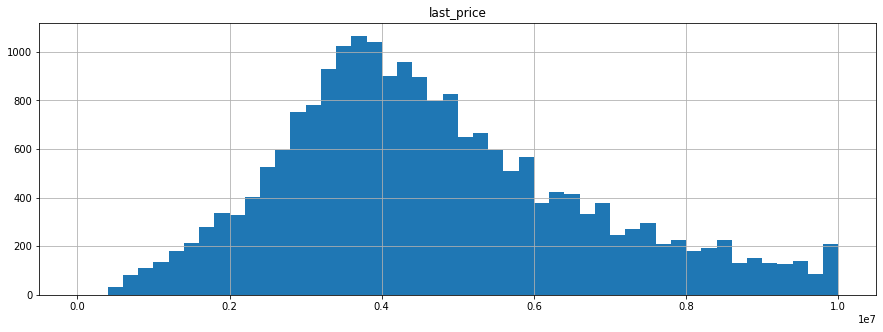

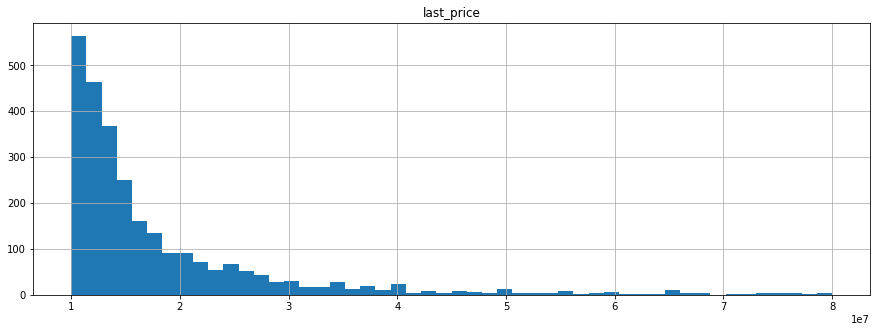

In [62]:
data.hist('last_price', bins = 50, range = (0,10000000), figsize = (15,5))
plt.show()
data.hist('last_price', bins = 50, range = (10000000,80000000), figsize = (15,5))
plt.show()

Здесь ничего не обычно, основной диапозон цен на варируется от 3 до 5 млн.р., имеются как и более бюджетные так и более дорогие квартиры, в конце заметен "хвост" из маленьких , но дорогих объявлений.

#### Количество комнат

In [63]:
data['rooms'].describe()

count    23639.000000
mean         2.070308
std          1.078742
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

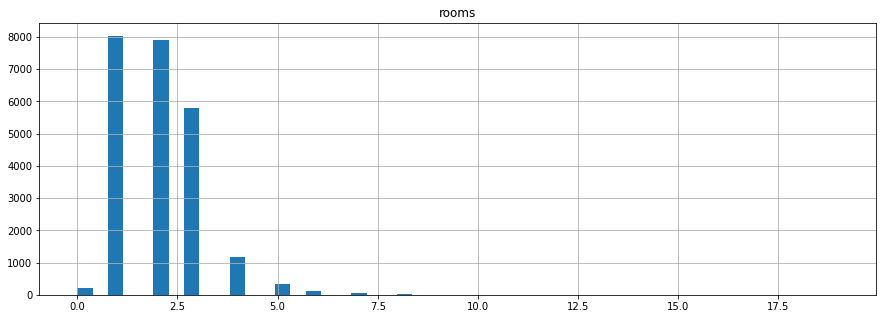

In [64]:
data.hist('rooms', bins = 50, range = (0,19), figsize = (15,5))
plt.show()

Как видно из графика, большая часть относится к 1 и 2 комнатам, что подтверждает наше предположение, что самые большие показатели по общей и жилой площади приходились на 1 и 2-комнатные квартиры. 3 комнаты встречаются реже, но то же давольно таки много ~6000 тысяч, объявления с 4мя встречаются ~1100 раз, отсальное количество комнат встречается реже.

#### Высота потолков

In [65]:
data['ceiling_height'].describe()

count    23639.000000
mean         2.696775
std          0.221099
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

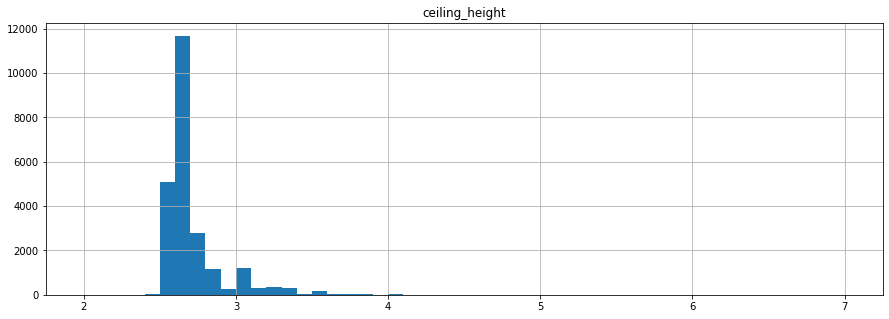

In [66]:
data.hist('ceiling_height', bins = 50, range = (2,7), figsize = (15,5))
plt.show()

Ранее мы избавились от потолков ниже 2 и выше 6 метров, а пропуски заменили медманным значение , по графику так и видно, большинство приходится на ~2.7м.

#### Этаж квартиры

In [67]:
data['floor'].describe()

count    23639.000000
mean         5.892550
std          4.881873
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

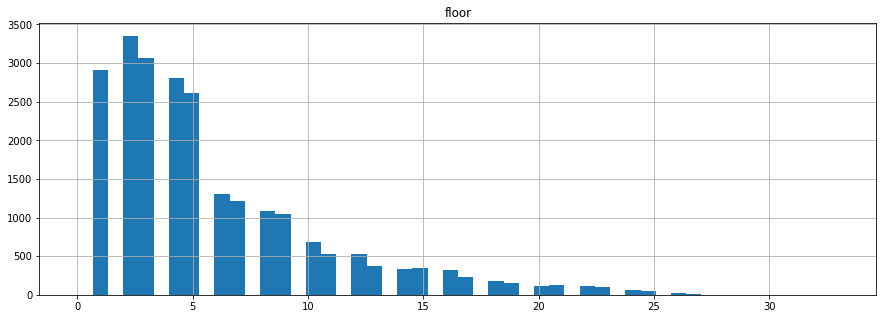

In [68]:
data.hist('floor', bins = 50, range = (0,33), figsize = (15,5))
plt.show()

Глядя на показатели, занимательно, что большиство объявлений приходятся на этажи с 1 по 5, вероятно это старые 5 этажные дома, в то время как в более высоких домах таких объявлений в разы меньше.

#### Тип этажа квартиры («первый», «последний», «другой»)

In [69]:
data['floor_class'].describe()

count      23639
unique         3
top       другой
freq       17401
Name: floor_class, dtype: object

In [70]:
# посмотрим на кол-во по каждой категории
data['floor_class'].value_counts()

другой       17401
последний     3328
первый        2910
Name: floor_class, dtype: int64

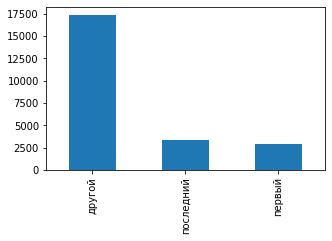

In [71]:
# отобразим на графике
data['floor_class'].value_counts().plot.bar(figsize=(5, 3))
plt.show()

Заметно, что большее кол-во объявлений не относятся к первому и последниму, в то время как объявлений на последнем и первом в ~7 раз меньше.

#### Общее количество этажей в доме

In [72]:
data['floors_total'].describe()

count    23554.000000
mean        10.674365
std          6.592603
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

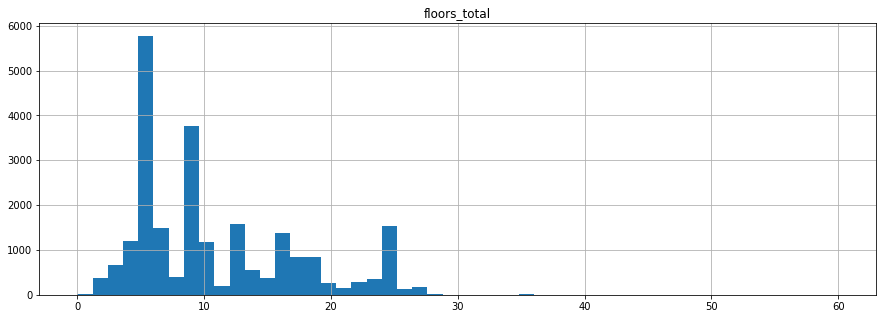

In [73]:
data.hist('floors_total', bins = 50, range = (0,60), figsize = (15,5))
plt.show()

Все верно, как и предпологали ранее пиковое значение приходится на дома имеющие 5 этажей - ~6000, дома с 9 этажами - поменьше, но все же много ~4000, остальные дома представлены реже.  

#### Расстояние до центра города в метрах

In [74]:
data['city_centers_nearest'].describe()

count    18812.000000
mean     14465.492585
std       8596.299721
min        181.000000
25%       9496.000000
50%      13270.000000
75%      16769.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

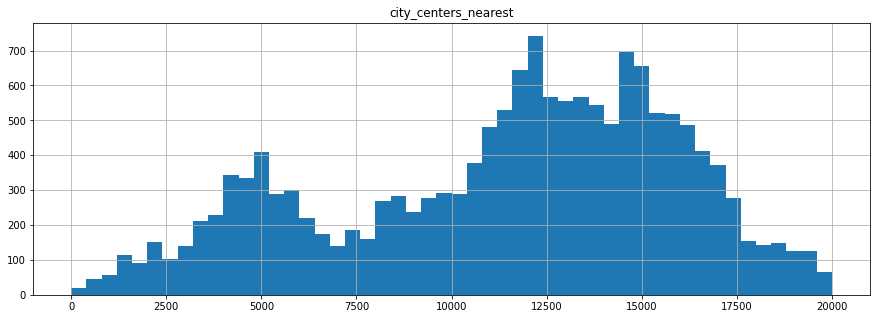

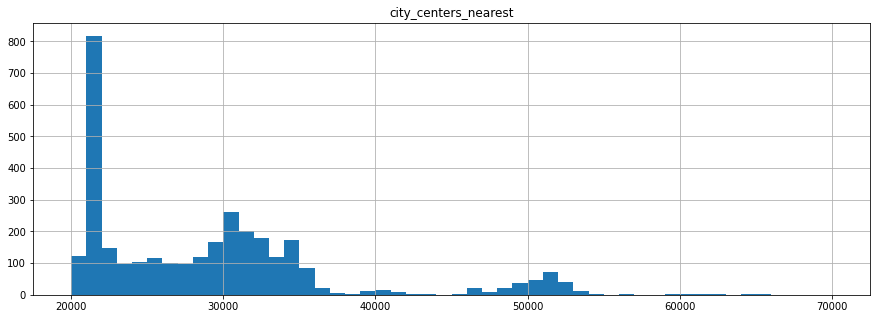

In [75]:
data.hist('city_centers_nearest', bins = 50, range = (0,20000), figsize = (15,5))
plt.show()
data.hist('city_centers_nearest', bins = 50, range = (20000,70000), figsize = (15,5))
plt.show()

Самые большие показатели приходятся на расстояние от 12 до 16км, вероятно это окраина и ближайшая лен.область, остальные показатели дальности встречаются реже.

#### Расстояние до ближайшего аэропорта

In [76]:
data['airports_nearest'].describe()

count    18812.000000
mean     29546.541489
std      13071.632192
min          0.000000
25%      18814.750000
50%      27223.000000
75%      38788.250000
max      84869.000000
Name: airports_nearest, dtype: float64

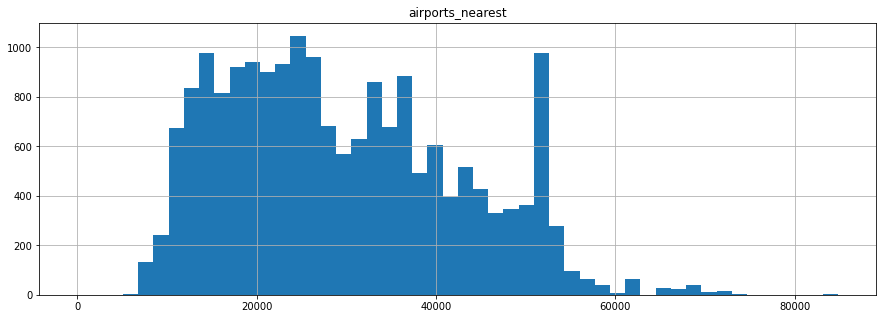

In [77]:
data.hist('airports_nearest', bins = 50, figsize = (15,5))
plt.show()

Подглядев в Яндекс карты и смотря на гистограмму , картина похожа на правду, расстояние от центра Питера до аэро Пулково, так и выходит около +- 25км, расстояние ниже - можно предположить, что это населенные пункты, которые находятся близ аэропорта(Пушкин, Красное село и т.д), расстояния выше - соответсвенно это более северная часть Питера, либо более населенные пункты.

#### Расстояние до ближайшего парка

In [78]:
data['parks_nearest'].describe()

count    17643.000000
mean       475.965822
std        235.677890
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

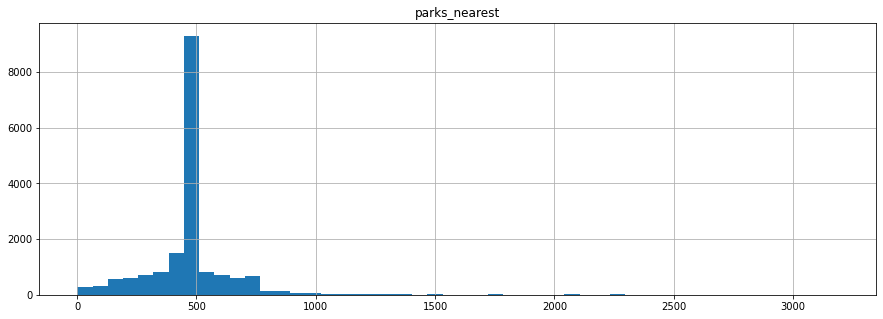

In [79]:
data.hist('parks_nearest', bins = 50, figsize = (15,5))
plt.show()

Ранее мы заполняли медианным значение(460м) расстояние до ближайшего парка, на графике это отчетливо видно, в целом ближайший парк находится в пределах 800м. Свыше стречается реже. 

#### День и месяц публикации объявления

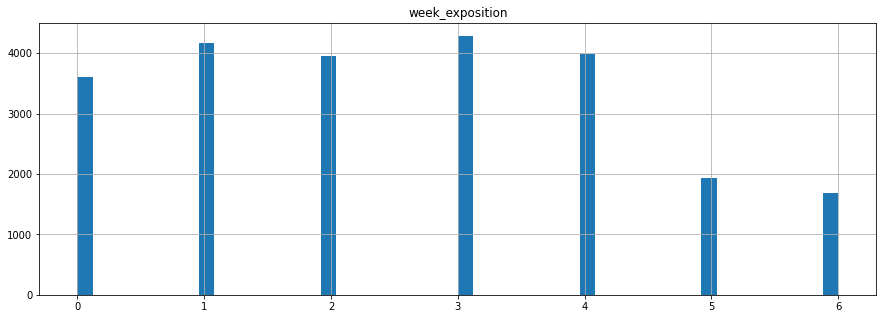

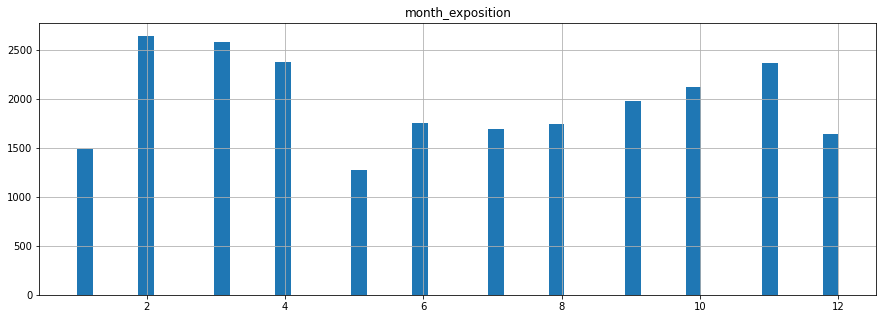

In [80]:
data.hist('week_exposition', bins = 50, figsize = (15,5))
plt.show()
data.hist('month_exposition', bins = 50, figsize = (15,5))
plt.show()

1. Рассматривая первый график, можно сказать точно - в будние дни объявления публикуют вдвое чаще чем в выходные дни. В четверг публикуют больше чем в осталыне дни.

2. Рассматривая в месечном срезе - в начале года, январь - пустоват, предположу что люди после праздников, и совсем не до публикации объявлений, начиная с февраля и до след. больших праздничных дней - публикуется большое количество, лето - как видно по графику не самые активные месяца, осенью вновь начинает увеличиваться число публикаций , и в конце года идет спад - что логично, люди начинают подготовку к новому году и т.д . 

### Изучите, как быстро продавались квартиры (столбец days_exposition). 

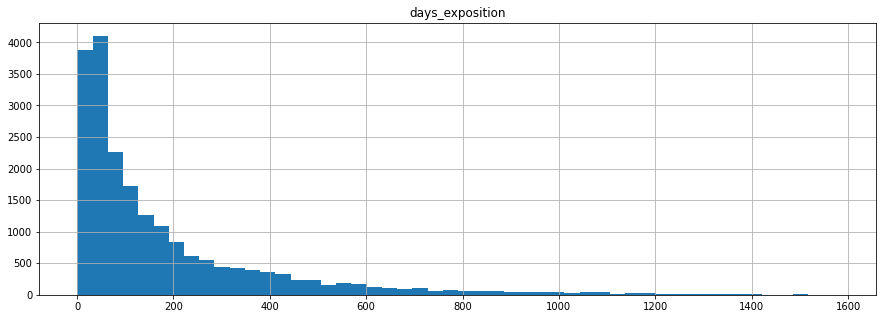

In [81]:
data.hist('days_exposition', bins = 50, figsize = (15,5))
plt.show()

In [82]:
# вычислим медиану и запишим в переменную
days_exposition_median = data['days_exposition'].median()
# вычислим среднее и запишим в переменную
days_exposition_mean = data['days_exposition'].mean()

print(f'Среднее количество дней: {days_exposition_mean}')
print(f'Медианное количество дней: {days_exposition_median}')

Среднее количество дней: 180.75790605601446
Медианное количество дней: 95.0


Можем предположить глядя на график, что быстрой считается около 50 дней, а долгой от 400 дней.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [83]:
# выведим таблицу по нужным столбцам и применим фунцию corr() - получим матрицу корреляции
data_corr = data[['last_price','total_area','living_area','kitchen_area','rooms','floor_class','week_exposition','month_exposition','year_exposition']].corr()
data_corr.style.background_gradient(cmap='RdYlGn')

,last_price,total_area,living_area,kitchen_area,rooms,week_exposition,month_exposition,year_exposition
last_price,1.000000,0.653858,0.585990,0.514848,0.363471,0.001596,0.002721,-0.042929
total_area,0.653858,1.000000,0.946280,0.660391,0.758767,-0.004658,0.005004,-0.079578
living_area,0.585990,0.946280,1.000000,0.503681,0.827157,-0.003861,-0.000429,-0.071370
kitchen_area,0.514848,0.660391,0.503681,1.000000,0.327188,-0.004742,0.003713,-0.060493
rooms,0.363471,0.758767,0.827157,0.327188,1.000000,-0.004325,-0.004377,-0.054566
week_exposition,0.001596,-0.004658,-0.003861,-0.004742,-0.004325,1.000000,0.011388,-0.003896
month_exposition,0.002721,0.005004,-0.000429,0.003713,-0.004377,0.011388,1.000000,-0.271129
year_exposition,-0.042929,-0.079578,-0.071370,-0.060493,-0.054566,-0.003896,-0.271129,1.000000


#### цена от общей площади/жилой/кухни/комнат/этажа/дней размещеня объявления 

Поочередно построим графики зависимости цены от :
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

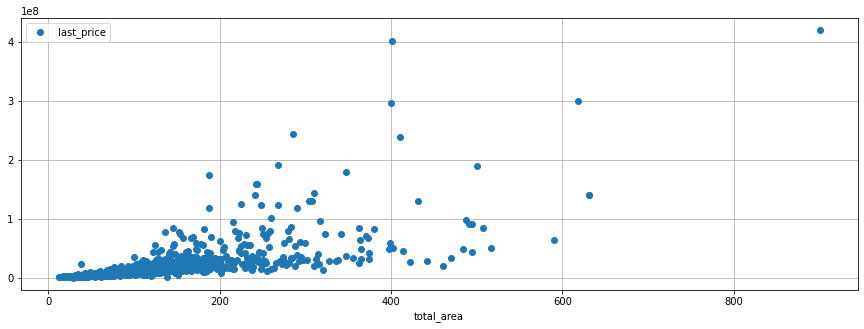

In [84]:
# цена х общая площадь
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(15, 5))
plt.show()


Заметно, что при увеличении общей площади , растет и общая стоимость квартиры, это прослеживается до ~100-150 кв.м. далее уже распределение не такое равномерное.

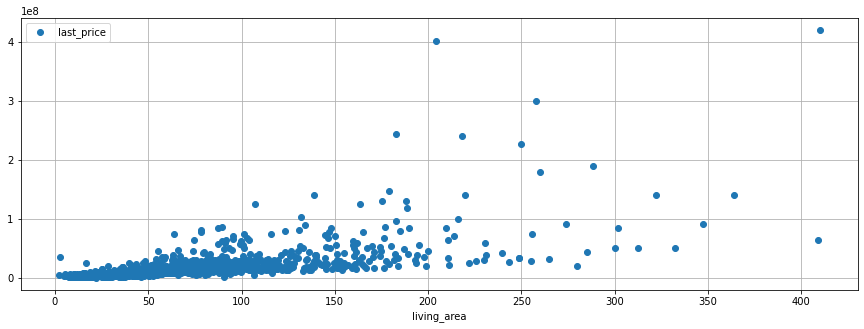

In [85]:
# цена х жилая площадь
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(15, 5))
plt.show()



Как и в случае с общей площадью прослеживается несильная зависимость, приблезительно до 70кв.м. далее зависимость не такая явная. 

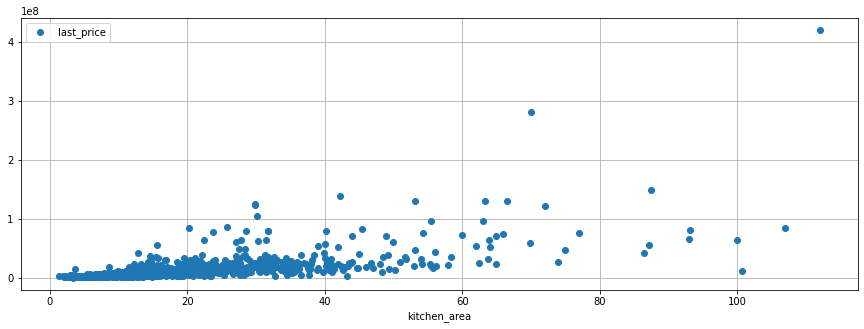

In [86]:
# цена х площадь кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(15, 5))
plt.show()



Прослеживается невысокая зависимость, цена увеливается с увеличением кухни приблезительно до +-17кв.м далее зависимость становится менее очивидная.

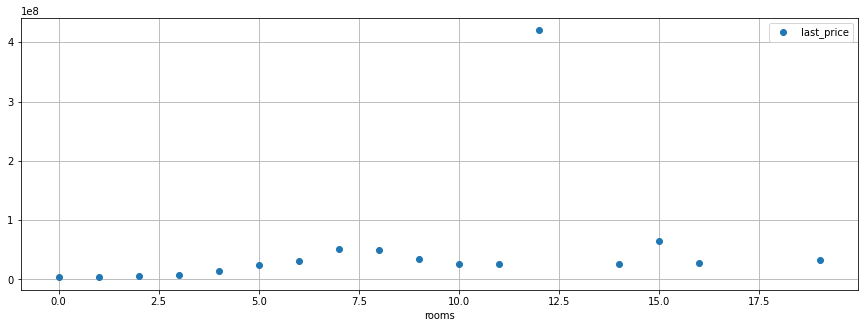

In [87]:
# цена х кол-во комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(15, 5))
plt.show()



В случае с комнатами, мы видим, что зависимость цены от кол-ва комнат слабо прослеживается. Цена увиличивает при возрастании комнат до 5, далее уже совсем слабо прослеживается или вовсе отсутвует.

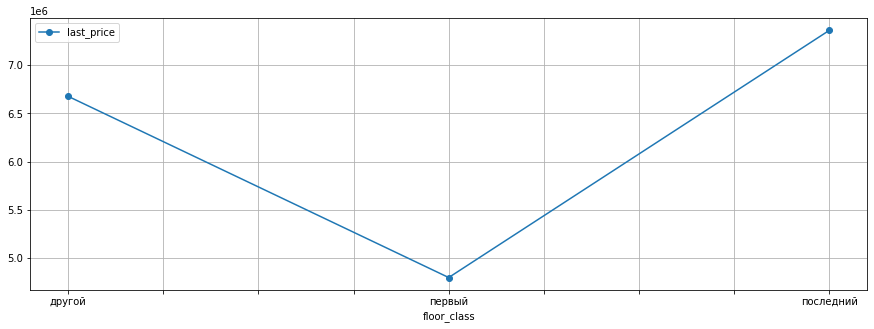

In [88]:
# цена х класс этажа
data.pivot_table(index='floor_class', values='last_price').plot(grid=True, style='-o', figsize=(15, 5))
plt.show()



Видно, что цена на первый этаж ниже остальных, да и кол-во объявлений меньше,можно предположить, что люди предпочитают остальные нежели первый,так же относится и к последнему - объявлений мало, но тут цена выше - это может быть связанно с разными факторами(красивый вид на город, собсвенный выход на крышу, или это квартира пентхауз и тд)

In [89]:
data['floor_class'].value_counts()

другой       17401
последний     3328
первый        2910
Name: floor_class, dtype: int64

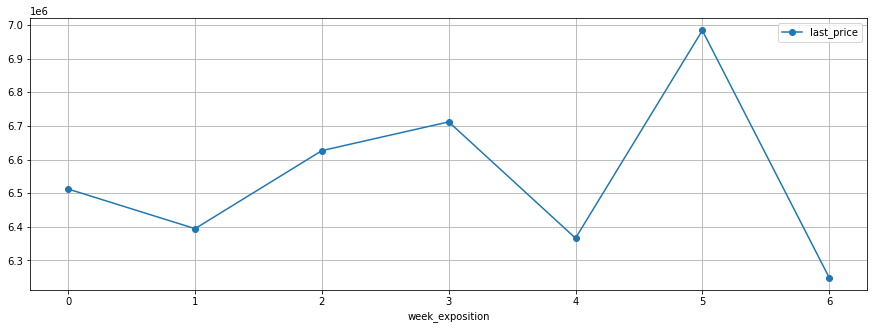

In [90]:
# цена х день размещения
data.pivot_table(index='week_exposition', values='last_price').plot(grid=True, style='-o', figsize=(15, 5))
plt.show()


Из графика видно , прямой зависимости нет, однако пиковые стоимости прослеживаются в субботу.

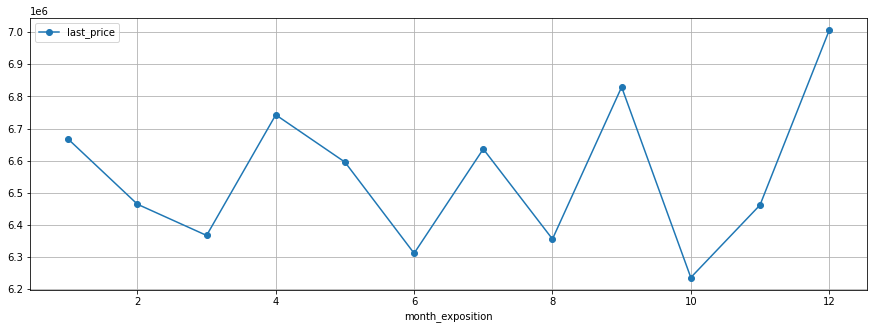

In [91]:
# цена х месяц размещения
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='-o', figsize=(15, 5))
plt.show()



Из графика то же видно, что прямой зависимотси нет , цена то растет то снижается на протяжении года, однако пиковое значение наблюдается в декабре.  Когда мы рассматривали кол-во выкладываемых объявлений на протяжении года, в декабре было одно из низких кол-в объявлений, вероятно - более дешевые квартиры продаются чаще и быстрее в течении года, в следствии чего можно предположить что,к концу года остаются более дорогие квартиры от туда и пиковое значение.

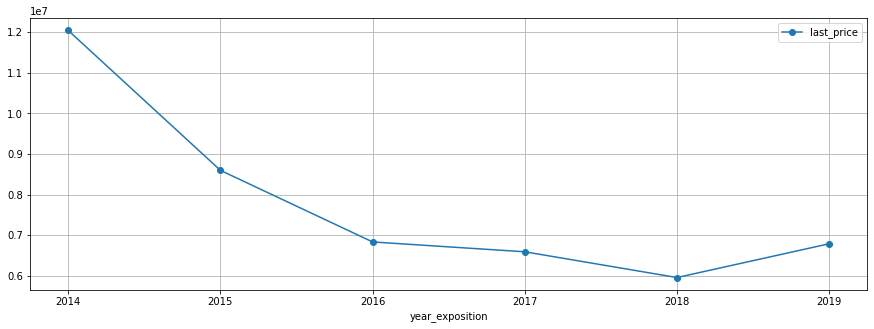

In [92]:
# цена х год размещения
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='-o', figsize=(15, 5))
plt.show()


На графике прослеживается снижение цены начиная с 2014 года по 2018. Можно преположить, что этот эффект вызван неким кризисом 2014-2015 годов, с 2018 года начинается плавный рост, это может быть связанно с разными фактороми(улучшение экономики, повышение заработных плат и тд.)

#   вывод

Глядя на матрицу и графики, можно сделать слудующие выводы, что __цена квартиры__ больше всего зависит от ее __общей площади__(коэф.кор.= 0.65), далее идет жилая площадь(0.56) и площадь кухни(0.52), это в принципе логично, т.к жилая и кухня входят в общую площадь.  Остальные зависмости не оказывают такое влияние на цену.


Вообще отвечая на вопрос "про влияние на продажу" - могу сказать следующие, на продажу квартиры могут повлиять абсолютно рандомные стечения абстоятельств, такие как "попался крутой риэлтор, который заключет сделку спустя 10 минут со знакомства с потенциальным покупателем", или просто "потенциальный клиент увидел объявление, влюбился в этот объект - и уже спустя 10 минут принимает решение, что будет покупать его" и т.д

Я думаю скорее всего люди при выборе квартиры, сначала строят себе в голове "идеальную квартиру" - с хорошей общей площадью, с нужным кол-вом комнат, просторной кухонькой, в хорошем районе и тд.  Дальше они идут гуглить, искать и переберать варианты отталкиваясь от своих нужд.

А на деле,иначе - отталкиваются от своего бюджета, далее наверно идет район, потом общая площадь(ведь можно перепланировать, перестороить, сдвинуть и тд),меньше уже влияют комнаты и кухня и этажность/этаж.

Все же возвращаясь к вопросу "Какие факторы больше всего влияют на общую стоимость объекта" если не смотреть на наши зависимоси - я думаю это район, общая площадь квартиры, близость метро/парков(развитая инфраструктура),какого года постройка(старенькая пятиэтажка или новый жк комплекс), все факторы в целом и формируют цена.

Как итог, большое влияние оказывает общая площадь, цена увеличивается с увеличением площади, почти такое же влияние оказывает жилая и площадь кухни, так же прослеживается небольшая зависимоть от кол-ва комнат(до 5),в среднем люди предпочитают не первый и не последний этаж(цены на первый этаж ниже остальных), месяц публикации меньше влияет, встречается,как и повышение так и понижение стоимости в течении года, в период с 2014 по 2018 цены падали, скорее всего постэффект кризиса, начиная с 2018 года цены начали рости.

In [93]:
data_corr = data[['last_price','total_area','living_area','kitchen_area','rooms','floor_class','week_exposition','month_exposition','year_exposition','days_exposition']].corr()
data_corr.style.background_gradient(cmap='RdYlGn')

,last_price,total_area,living_area,kitchen_area,rooms,week_exposition,month_exposition,year_exposition,days_exposition
last_price,1.000000,0.653858,0.585990,0.514848,0.363471,0.001596,0.002721,-0.042929,0.080964
total_area,0.653858,1.000000,0.946280,0.660391,0.758767,-0.004658,0.005004,-0.079578,0.149589
living_area,0.585990,0.946280,1.000000,0.503681,0.827157,-0.003861,-0.000429,-0.071370,0.143216
kitchen_area,0.514848,0.660391,0.503681,1.000000,0.327188,-0.004742,0.003713,-0.060493,0.113836
rooms,0.363471,0.758767,0.827157,0.327188,1.000000,-0.004325,-0.004377,-0.054566,0.126358
week_exposition,0.001596,-0.004658,-0.003861,-0.004742,-0.004325,1.000000,0.011388,-0.003896,-0.024666
month_exposition,0.002721,0.005004,-0.000429,0.003713,-0.004377,0.011388,1.000000,-0.271129,-0.030061
year_exposition,-0.042929,-0.079578,-0.071370,-0.060493,-0.054566,-0.003896,-0.271129,1.000000,-0.611549
days_exposition,0.080964,0.149589,0.143216,0.113836,0.126358,-0.024666,-0.030061,-0.611549,1.000000


### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [94]:
# сгруппируем по локации, цену кв.м и применим функции count и mean, отсортируем по кол-ву на убывание. 
top_10_city = data.groupby('locality_name')['one_metr_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
# переименуем столбец count и mean
top_10_city.columns = ['count', 'one_metr_price']
print(top_10_city.sort_values(by='one_metr_price', ascending=False))

                   count  one_metr_price
locality_name                           
Санкт-Петербург    15713   114828.256157
Пушкин               369   103125.373984
Кудрово              472    95324.476695
поселок Парголово    327    90175.489297
Мурино               590    86087.055932
поселок Шушары       440    78676.904545
Колпино              338    75424.150888
Гатчина              307    68745.693811
Всеволожск           398    68654.007538
Выборг               237    58141.489451


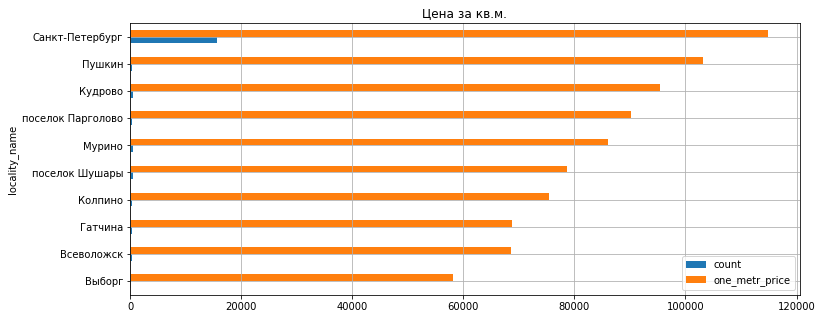

In [95]:
# для наглядности построим горизонтальную столбчатую диаграмму 
top_10_city.sort_values(by='one_metr_price').plot(kind='barh', legend=True, grid=True, figsize=(12, 5))
plt.title('Цена за кв.м.')
plt.show()

Как итог мы видим, что самая высокая средня цена за кв.м. - Санкт-Петербурге, что логично, далее идет город Пушкин, что тоже логично т.к. он рассположен очень близко к СП и аэропорту Пулково, самая низкая цена в Выборге.

### Вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города

In [96]:
# создадим отдельную таблицу отсортировав по локации и берем 2 столбца прайс и растояние до центра
mean_km_price = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'city_centers_nearest_km']].reset_index(drop=True)
mean_km_price['city_centers_nearest_km'] = mean_km_price['city_centers_nearest_km'].astype('int')
mean_km_price.head(10)

,last_price,city_centers_nearest_km
0,13000000,16
1,5196000,14
2,64900000,7
3,10000000,8
4,7915000,12
5,5400000,15
6,5050000,14
7,4650000,14
8,6700000,11
9,4180000,15


In [97]:
# сделаем свободную таблицу по расстоянию и применим функцию mean к столбцу цена
mean_km_price_pivot = mean_km_price.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
# для компактности обрежем нули(миллион)
mean_km_price_pivot['last_price'] = mean_km_price_pivot['last_price']/1000000
mean_km_price_pivot

,last_price
city_centers_nearest_km,
0,31.449116
1,21.206721
2,17.788320
3,11.126581
4,13.304280
5,14.499121
6,15.338418
7,14.775153
8,9.949257


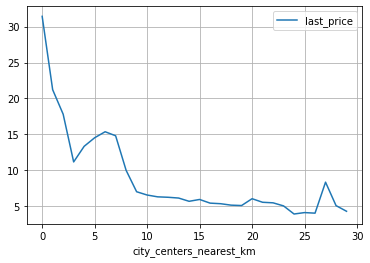

In [98]:
mean_km_price_pivot.plot(grid=True)
plt.show()

Глядя на таблицу и график, можем сказать следующее, самое дорогое жилье находится в пределах 3 км от центра, далее мы видим небольшой скачек в районе 5,6 км, возможно там дорогой ЖК, или набережная, или историческое место и тд, далее идет линейный спад , под конец заметен тоже небольшой скачек - вероятно это какие близлежащие новые/модные/дорогие коттеджные поселки или в целом новые районы или иные факторы. 

# Вывод

В ходе проекта было выполнено: 
- предобработка данных, а именно: 
    - приведены к общему стилю несколько столбцов.
    - заполнены пропуски, там где это было возможно.
    - обработаны аномалии.
    - обработаны неявные дубликаты
    - изменили типы данных.
    - добавили несколько новых стобцов, для дальнейших задач.
- изучили следующие параметры объектов, построили графики, проанализировали и написали мини наблюдения по каждуму из объектов:
    - общая площадь.
    - жилая площадь.
    - площадь кухни.
    - количество комнат.
    - высота потолков.
    - этаж квартиры.
    - тип этажа квартиры («первый», «последний», «другой»).
    - общее количество этажей в доме.
    - расстояние до центра города в метрах.
    - расстояние до ближайшего аэропорта.
    - расстояние до ближайшего парка.
    - день и месяц публикации объявления.
- изучили, как быстро продаются квартиры.
- изучили, какие факторы больше всего влияют на общую (полную) стоимость объекта?
- рассчитали среднюю стоимость кв.м. в топ 10 городах по кол-ву объявлений.
- вычислили среднюю стоимость кв.км. в зависимости от отдаленности от центра города.

__Подводя итог, по результатам данного исследования можно сделать следующие выводы:__
1. большая часть обьявлений состоит из 1,2 комнатных квартир.
2. средняя цена состовляет от 3.5 до 4 млн.руб.
3. основная зависимость стоимости квартир - это зависимость от ее площади.
4. в основном представлены дома 5 и 9 этажные.
5. время продажи квартир варьирует в среднем(медиана) до 50 дней и выше.
6. самые дорогие объявления - это объявления по гор.Санкт-Петербург, а именно центр и его окружность в радиусе 3км.